In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Skin_cancer_dataset/dataset.zip

Archive:  /content/drive/MyDrive/Skin_cancer_dataset/dataset.zip
  inflating: 8020 Original Split/test/vascular lesion/ISIC_0032745.jpg  
  inflating: 8020 Original Split/test/vascular lesion/ISIC_0033158.jpg  
  inflating: 8020 Original Split/test/vascular lesion/ISIC_0031093.jpg  
  inflating: 8020 Original Split/test/vascular lesion/ISIC_0033450.jpg  
  inflating: 8020 Original Split/test/vascular lesion/ISIC_0027385.jpg  
  inflating: 8020 Original Split/test/vascular lesion/ISIC_0033123.jpg  
  inflating: 8020 Original Split/test/vascular lesion/ISIC_0027210.jpg  
  inflating: 8020 Original Split/test/vascular lesion/ISIC_0032057.jpg  
  inflating: 8020 Original Split/test/vascular lesion/ISIC_0031276.jpg  
  inflating: 8020 Original Split/test/vascular lesion/ISIC_0031346.jpg  
  inflating: 8020 Original Split/test/vascular lesion/ISIC_0027888.jpg  
  inflating: 8020 Original Split/test/vascular lesion/ISIC_0031955.jpg  
  inflating: 8020 Original Split/test/vascular lesion/ISIC_

In [ ]:
train_path = "/content/8020 Original Split/train";
test_path = "/content/8020 Original Split/test";

In [ ]:
SEED = 12
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 3)
BATCH_SIZE = 64
EPOCHS = 20

##trying shit

Class Counts Before Sampling: {'Larva Migrans': 112, 'Molluscum Contagiosum': 107, 'Tinea Nigra': 94, 'Hailey-Hailey Disease': 116, 'actinic keratosis': 104, 'Epidermolysis Bullosa Pruriginosa': 76, 'squamous cell carcinoma': 157, 'Leprosy Lepromatous': 234, 'seborrheic keratosis': 64, 'nevus': 298, 'Neurofibromatosis': 68, 'Lichen Planus': 105, 'Porokeratosis Actinic': 101, 'Papilomatosis Confluentes And Reticulate': 72, 'Melanoma': 100, 'Herpes Simplex': 70, 'Psoriasis': 105, 'Leprosy Borderline': 116, 'Impetigo': 88, 'Basal Cell Carcinoma': 334, 'Tungiasis': 106, 'Tinea Corporis': 91, 'Mycosis Fungoides': 92, 'dermatofibroma': 88, 'Lupus Erythematosus Chronicus Discoides': 92, 'Darier_s Disease': 76, 'Pediculosis Capitis': 65, 'pigmented benign keratosis': 382, 'Pityriasis Rosea': 103, 'Leprosy Tuberculoid': 187, 'vascular lesion': 113}


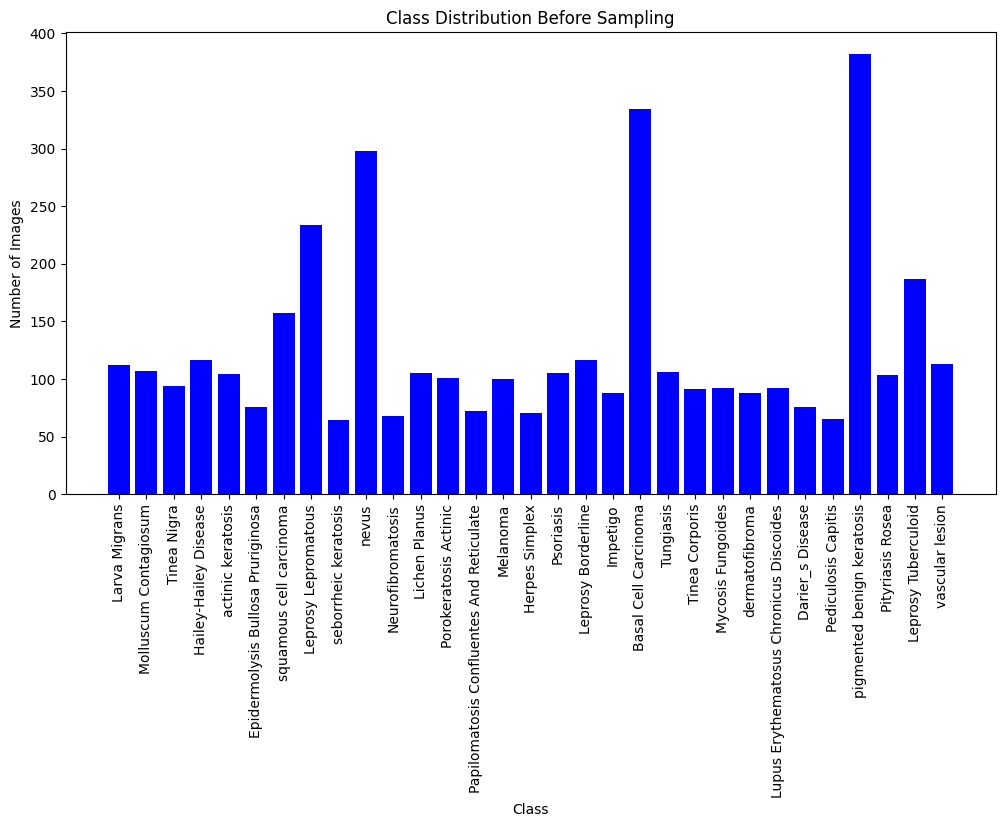

In [ ]:
import os
import matplotlib.pyplot as plt

# Path to your dataset
dataset_path = "/content/8020 Original Split/train"

# Get list of all classes (subdirectories)
classes = os.listdir(dataset_path)


# Dictionary to store number of images per class
class_counts_before = {}

# Count images in each class
for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)
    num_images = len(os.listdir(class_dir))
    class_counts_before[class_name] = num_images

print("Class Counts Before Sampling:", class_counts_before)

# Plotting the distribution
plt.figure(figsize=(12, 6))
plt.bar(class_counts_before.keys(), class_counts_before.values(), color='blue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution Before Sampling')
plt.xticks(rotation=90)
plt.show()


Class Counts After Sampling: {'Larva Migrans': 300, 'Molluscum Contagiosum': 300, 'Tinea Nigra': 300, 'Hailey-Hailey Disease': 300, 'actinic keratosis': 300, 'Epidermolysis Bullosa Pruriginosa': 300, 'squamous cell carcinoma': 300, 'Leprosy Lepromatous': 300, 'seborrheic keratosis': 300, 'nevus': 300, 'Neurofibromatosis': 300, 'Lichen Planus': 300, 'Porokeratosis Actinic': 300, 'Papilomatosis Confluentes And Reticulate': 300, 'Melanoma': 300, 'Herpes Simplex': 300, 'Psoriasis': 300, 'Leprosy Borderline': 300, 'Impetigo': 300, 'Basal Cell Carcinoma': 300, 'Tungiasis': 300, 'Tinea Corporis': 300, 'Mycosis Fungoides': 300, 'dermatofibroma': 300, 'Lupus Erythematosus Chronicus Discoides': 300, 'Darier_s Disease': 300, 'Pediculosis Capitis': 300, 'pigmented benign keratosis': 300, 'Pityriasis Rosea': 300, 'Leprosy Tuberculoid': 300, 'vascular lesion': 300}


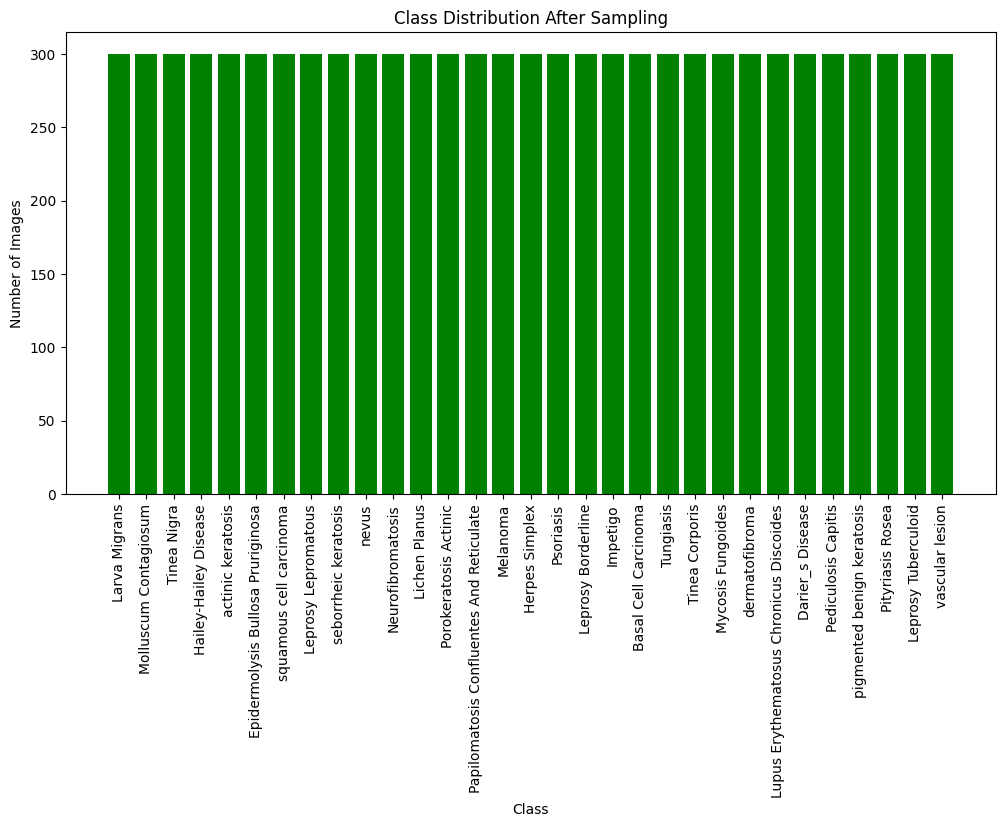

In [ ]:
from shutil import copyfile
import random

target_num_images = 300

for class_name, count in class_counts_before.items():
    class_dir = os.path.join(dataset_path, class_name)
    files = os.listdir(class_dir)
    current_num_images = len(files)

    if current_num_images < target_num_images:
        # Oversample
        while current_num_images < target_num_images:
            # Choose a random image to copy
            random_file = random.choice(files)
            src = os.path.join(class_dir, random_file)
            dst = os.path.join(class_dir, f"copy_{current_num_images}.jpg")
            copyfile(src, dst)
            current_num_images += 1
    elif current_num_images > target_num_images:
        # Undersample
        files_to_remove = random.sample(files, current_num_images - target_num_images)
        for file_name in files_to_remove:
            os.remove(os.path.join(class_dir, file_name))

# Recalculate class counts after sampling
class_counts_after = {}

for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)
    num_images = len(os.listdir(class_dir))
    class_counts_after[class_name] = num_images

print("Class Counts After Sampling:", class_counts_after)

# Plotting the distribution after sampling
plt.figure(figsize=(12, 6))
plt.bar(class_counts_after.keys(), class_counts_after.values(), color='green')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution After Sampling')
plt.xticks(rotation=90)
plt.show()


In [ ]:
import os
from sklearn.model_selection import train_test_split
import shutil

# Path to your balanced dataset
dataset_path = "/content/8020 Original Split/train"
train_path = "/content/8020 Original Split/train_split"
val_path = "/content/8020 Original Split/val_split"

# If directories already exist, delete them
if os.path.exists(train_path):
    shutil.rmtree(train_path)
if os.path.exists(val_path):
    shutil.rmtree(val_path)

# Create new directories for train and validation splits
os.makedirs(train_path)
os.makedirs(val_path)

# Get list of all classes (subdirectories)
classes = os.listdir(dataset_path)

# Split data into train and validation sets
for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)
    files = os.listdir(class_dir)

    # Split files into train and validation sets
    train_files, val_files = train_test_split(files, test_size=0.2, random_state=SEED)

    # Create directories for this class in train and val sets
    os.makedirs(os.path.join(train_path, class_name))
    os.makedirs(os.path.join(val_path, class_name))

    # Move files to train and val directories
    for file in train_files:
        src = os.path.join(class_dir, file)
        dst = os.path.join(train_path, class_name, file)
        shutil.copy(src, dst)

    for file in val_files:
        src = os.path.join(class_dir, file)
        dst = os.path.join(val_path, class_name, file)
        shutil.copy(src, dst)

print("Dataset split into train and validation sets successfully.")


Dataset split into train and validation sets successfully.


In [ ]:
resampled_train = "/content/8020 Original Split/train_split"
resampled_val = "/content/8020 Original Split/val_split"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    resampled_train,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    resampled_val,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 7440 images belonging to 31 classes.
Found 1860 images belonging to 31 classes.


##actual thing

In [ ]:
import tensorflow as tf
def normalize_img(image, label):
    # Normalize pixel values to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_set = image_dataset_from_directory(
    train_path,
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True,
    seed=SEED,
    validation_split=0.2,
    subset='training',
).map(normalize_img)
val_set = image_dataset_from_directory(
    train_path,
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True,
    seed=SEED,
    validation_split=0.2,
    subset='validation',
).map(normalize_img)
test_set = image_dataset_from_directory(
    test_path,
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False,
).map(normalize_img)

Found 3916 files belonging to 31 classes.
Using 3133 files for training.
Found 3916 files belonging to 31 classes.
Using 783 files for validation.
Found 994 files belonging to 31 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121, InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, MaxPooling2D, Conv2D, Flatten
from tensorflow.keras.layers import Dense, BatchNormalization, Conv2D, AveragePooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

combination

In [ ]:
def transfer_learning_densenet(input_tensor):
    pretrained_model = DenseNet121(include_top=False, input_shape=IMG_SHAPE, weights='imagenet')
    for layer in pretrained_model.layers:
        layer.trainable = False
    x = pretrained_model(input_tensor)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.0001))(x)
    x = BatchNormalization()(x)
    return x

In [ ]:
def transfer_learning_inception(input_tensor):
    pretrained_model = InceptionV3(include_top=False, input_shape=IMG_SHAPE, weights='imagenet')
    for layer in pretrained_model.layers:
        layer.trainable = False
    x = pretrained_model(input_tensor)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.0001))(x)
    x = BatchNormalization()(x)
    return x

In [ ]:
def create_model():
    input_layer = tf.keras.Input(shape=IMG_SHAPE)
    x1 = transfer_learning_densenet(input_layer)
    x2 = transfer_learning_inception(input_layer)
    merged = tf.keras.layers.concatenate([x1, x2])
    x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.0001))(merged)
    x = Dropout(0.2)(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.2)(x)
    predictions = Dense(31, activation='softmax', name='classification', kernel_regularizer=tf.keras.regularizers.l1(0.01))(x)
    model = Model(inputs=input_layer, outputs=predictions)
    return model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

model = create_model()
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=[AUC(), 'accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 densenet121 (Functional)    (None, 7, 7, 1024)           7037504   ['input_1[0][0]']             
                                                                                                  
 inception_v3 (Functional)   (None, 5, 5, 2048)           2180278   ['input_1[0][0]']             
                                                          4                                       
                                                                                                  
 global_average_pooling2d (  (None, 1024)                 0         ['densenet121[0][0]']     

Training

In [ ]:
# history = model.fit(x = train_set, validation_data = val_set, epochs = EPOCHS)
history = model.fit(train_generator, epochs = EPOCHS, validation_data = validation_generator)

Epoch 1/20
117/117 [==============================] - 205s 2s/step - loss: 9.3943 - auc_2: 0.9699 - accuracy: 0.6161 - val_loss: 8.4851 - val_auc_2: 0.9762 - val_accuracy: 0.6602
Epoch 2/20
117/117 [==============================] - 224s 2s/step - loss: 7.8298 - auc_2: 0.9775 - accuracy: 0.6644 - val_loss: 7.1496 - val_auc_2: 0.9800 - val_accuracy: 0.6930
Epoch 3/20
117/117 [==============================] - 203s 2s/step - loss: 6.6604 - auc_2: 0.9809 - accuracy: 0.6953 - val_loss: 6.1602 - val_auc_2: 0.9825 - val_accuracy: 0.7118
Epoch 4/20
117/117 [==============================] - 200s 2s/step - loss: 5.8169 - auc_2: 0.9841 - accuracy: 0.7179 - val_loss: 5.4739 - val_auc_2: 0.9840 - val_accuracy: 0.7210
Epoch 5/20
117/117 [==============================] - 218s 2s/step - loss: 5.2289 - auc_2: 0.9863 - accuracy: 0.7421 - val_loss: 4.9886 - val_auc_2: 0.9853 - val_accuracy: 0.7532
Epoch 6/20
 38/117 [========>.....................] - ETA: 1:59 - loss: 4.9292 - auc_2: 0.9868 - accuracy

KeyboardInterrupt: 

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
# Load the test set
test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 994 images belonging to 31 classes.


In [ ]:
test_loss, test_auc, test_acc = model.evaluate(test_set)
print(f"Test Loss: {test_loss}")
print(f"Test AUC: {test_auc}")
print(f"Test Accuracy: {test_acc}")


16/16 [==============================] - 15s 902ms/step - loss: 1.4174 - auc: 0.9601


ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

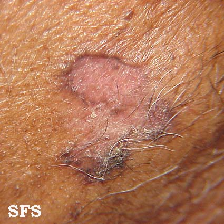

In [ ]:
img = image.load_img('/content/8020 Original Split/test/Basal Cell Carcinoma/528.jpg', target_size = (224,224))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0) #expanding the dimension of the array
pred = np.argmax(model.predict(x)) #predict the higher probability index
class_names[pred]

1/1 [==============================] - 0s 37ms/step


'Basal Cell Carcinoma'

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
test_generator = test_set.as_numpy_iterator()
true_labels = []
predictions = []

for images, labels in test_generator:
    true_labels.extend(np.argmax(labels, axis=1))
    pred = model.predict(images)
    predictions.extend(np.argmax(pred, axis=1))
true_labels = np.array(true_labels)
predictions = np.array(predictions)

2/2 [==============================] - 7s 4s/step


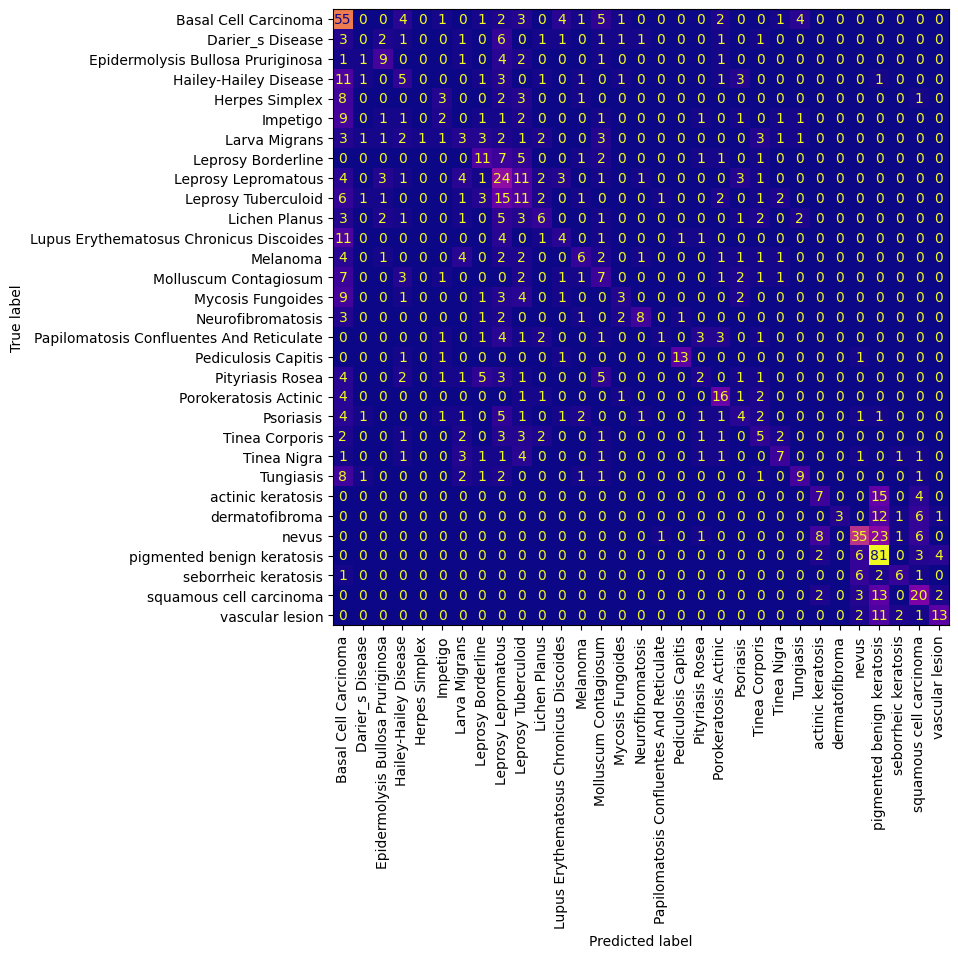

In [ ]:
class_names = train_set.class_names
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay.from_predictions(
    true_labels, predictions, display_labels=class_names, xticks_rotation="vertical",
    ax=ax, colorbar=False, cmap="plasma")

plt.show()


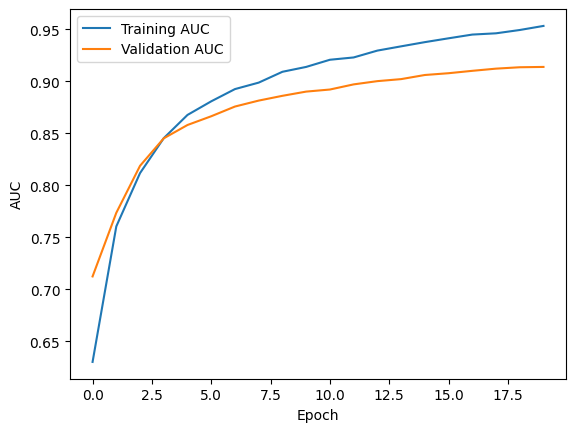

In [ ]:
import matplotlib.pyplot as plt

auc_values = history.history['auc']
val_auc_values = history.history['val_auc']

plt.plot(auc_values, label='Training AUC')
plt.plot(val_auc_values, label='Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.show()

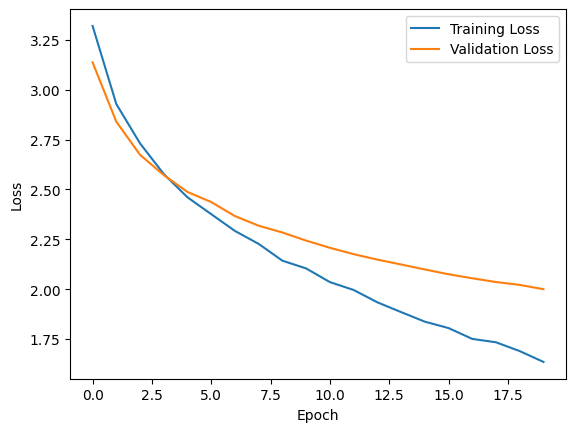

In [ ]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

plt.plot(loss_values, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()